<a href="https://colab.research.google.com/github/akashb1504/Rainfall-Prediction-using-Machine-Learning-Models/blob/main/Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


# Dataset

In [52]:
df = pd.read_csv('Rainfall.csv')

In [54]:
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [55]:
df.shape

(366, 12)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [57]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [58]:
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [59]:
df=df.dropna()

In [60]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [62]:
df.rename(str.strip, axis='columns', inplace=True)
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [63]:
df['rainfall'].value_counts()

,count
rainfall,
yes,248
no,117


In [64]:
df.replace({'yes':1, 'no':0}, inplace=True)

In [65]:
corr=df.corr()
corr

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
day,1.000000,0.042125,-0.015136,-0.012458,-0.007484,-0.049619,-0.117584,-0.112503,0.011796,0.110170,0.042203,-0.031906
pressure,0.042125,1.000000,-0.828670,-0.851628,-0.839583,-0.859880,-0.273631,0.006881,-0.087161,-0.196850,-0.662586,0.374046
maxtemp,-0.015136,-0.828670,1.000000,0.986189,0.961461,0.899588,0.020450,-0.291071,-0.102922,0.506863,0.629555,-0.442357
temparature,-0.012458,-0.851628,0.986189,1.000000,0.990173,0.936769,0.090893,-0.206894,-0.038905,0.419919,0.648865,-0.393739
mintemp,-0.007484,-0.839583,0.961461,0.990173,1.000000,0.944409,0.137901,-0.157112,-0.009294,0.367565,0.633513,-0.359130
dewpoint,-0.049619,-0.859880,0.899588,0.936769,0.944409,1.000000,0.424493,0.043753,0.138386,0.184151,0.628190,-0.378435
humidity,-0.117584,-0.273631,0.020450,0.090893,0.137901,0.424493,1.000000,0.655338,0.489075,-0.564896,0.101237,-0.076613
cloud,-0.112503,0.006881,-0.291071,-0.206894,-0.157112,0.043753,0.655338,1.000000,0.625602,-0.849337,-0.076168,0.258400
rainfall,0.011796,-0.087161,-0.102922,-0.038905,-0.009294,0.138386,0.489075,0.625602,1.000000,-0.554083,-0.013214,0.154488
sunshine,0.110170,-0.196850,0.506863,0.419919,0.367565,0.184151,-0.564896,-0.849337,-0.554083,1.000000,0.253261,-0.298892


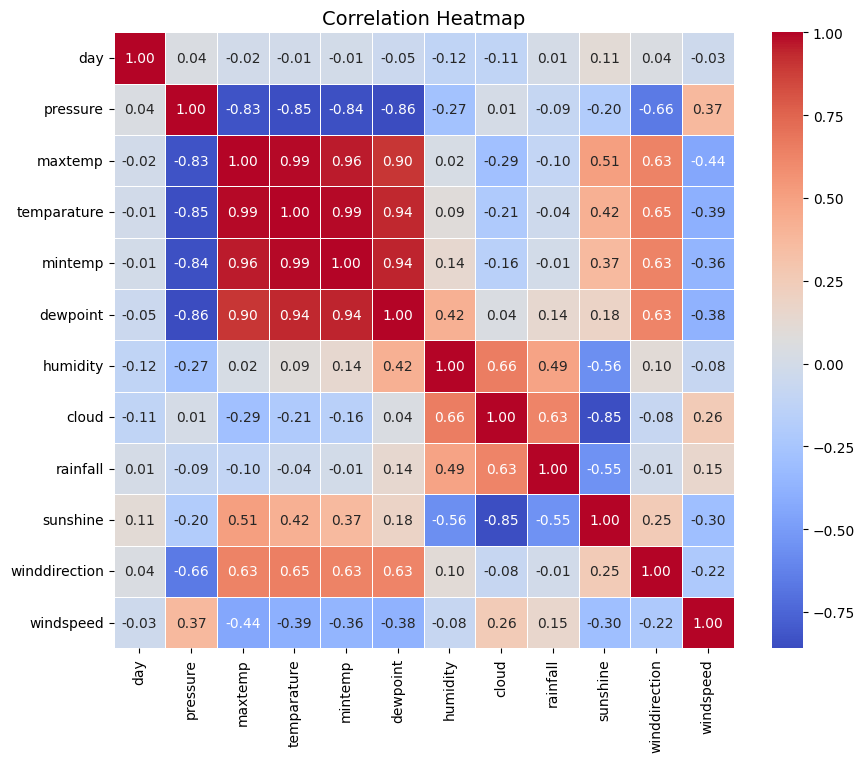

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [67]:
df.drop(['maxtemp', 'mintemp','day'], axis=1, inplace=True)

# Model Training

In [40]:
features = df.drop(['rainfall'], axis=1)
target = df.rainfall

In [41]:
X_train, X_val, Y_train, Y_val = train_test_split(features,target,test_size=0.2,stratify=target,random_state=2)

In [ ]:
# Random Over Sampling to deal with clas imbalance
ros = RandomOverSampler(sampling_strategy='minority',random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)

In [42]:
# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

# Logistic Regression

In [46]:
log_reg = LogisticRegression()
log_reg.fit(X, Y)

print("Logistic Regression:")
val_preds = log_reg.predict(X_val)

print("Validation Accuracy:", metrics.accuracy_score(Y_val, val_preds))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(Y_val, val_preds))
print("\nClassification Report:")
print(metrics.classification_report(Y_val, val_preds))


Logistic Regression:
Validation Accuracy: 0.8356164383561644

Confusion Matrix:
[[17  6]
 [ 6 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        23
           1       0.88      0.88      0.88        50

    accuracy                           0.84        73
   macro avg       0.81      0.81      0.81        73
weighted avg       0.84      0.84      0.84        73



# XGBoost

In [47]:
xgb = XGBClassifier()
xgb.fit(X, Y)

print("XGBoost:")
val_preds = xgb.predict(X_val)
print("Validation Accuracy:", metrics.accuracy_score(Y_val, val_preds))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(Y_val, val_preds))
print("\nClassification Report:")
print(metrics.classification_report(Y_val, val_preds))

XGBoost:
Validation Accuracy: 0.7671232876712328

Confusion Matrix:
[[13 10]
 [ 7 43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.57      0.60        23
           1       0.81      0.86      0.83        50

    accuracy                           0.77        73
   macro avg       0.73      0.71      0.72        73
weighted avg       0.76      0.77      0.76        73



# Support Vector Classifier

In [48]:
svc = SVC(kernel='rbf', probability=True)
svc.fit(X, Y)

print("Support Vector Classifier:")
val_preds = svc.predict(X_val)

print("Validation Accuracy:", metrics.accuracy_score(Y_val, val_preds))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(Y_val, val_preds))
print("\nClassification Report:")
print(metrics.classification_report(Y_val, val_preds))

Support Vector Classifier:
Validation Accuracy: 0.821917808219178

Confusion Matrix:
[[15  8]
 [ 5 45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.65      0.70        23
           1       0.85      0.90      0.87        50

    accuracy                           0.82        73
   macro avg       0.80      0.78      0.79        73
weighted avg       0.82      0.82      0.82        73



# Random Forest

In [49]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, Y)

print("Random Forest Classifier:")
val_preds = rf.predict(X_val)


print("Validation Accuracy:", metrics.accuracy_score(Y_val, val_preds))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(Y_val, val_preds))
print("\nClassification Report:")
print(metrics.classification_report(Y_val, val_preds))

Random Forest Classifier:
Validation Accuracy: 0.7945205479452054

Confusion Matrix:
[[13 10]
 [ 5 45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.57      0.63        23
           1       0.82      0.90      0.86        50

    accuracy                           0.79        73
   macro avg       0.77      0.73      0.75        73
weighted avg       0.79      0.79      0.79        73



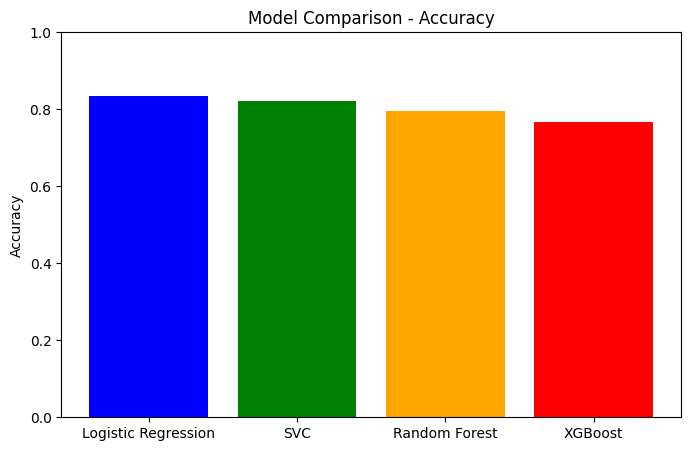

In [51]:
accuracies = {}

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X, Y)
lr_preds = lr.predict(X_val)
accuracies["Logistic Regression"] = metrics.accuracy_score(Y_val, lr_preds)

# Support Vector Classifier
svc = SVC(kernel='rbf')
svc.fit(X, Y)
svc_preds = svc.predict(X_val)
accuracies["SVC"] = metrics.accuracy_score(Y_val, svc_preds)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, Y)
rf_preds = rf.predict(X_val)
accuracies["Random Forest"] = metrics.accuracy_score(Y_val, rf_preds)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X, Y)
xgb_preds = xgb.predict(X_val)
accuracies["XGBoost"] = metrics.accuracy_score(Y_val, xgb_preds)

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'red'])
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim(0, 1)
plt.show()
